# This is an experiment of my own

How well does a neural network work for linear regression? Obviously it is way overkill, but it is interesting to check!

In [1]:
# Imports
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

Using Theano backend.


In [2]:
N = 10000
batch_size = N//100
nb_epoch = 15
nb_dense = 512
nb_hidden = 1   # The number of hidden layers to use
p_dropout = 0.5

(7500, 2) (2500, 2) (7500, 1) (2500, 1)


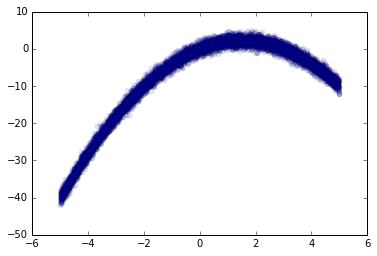

In [3]:
# Make data: y = 3x - x^2
x = np.random.uniform(-5, 5, N)
X = np.column_stack((x, x**2))
y = 3*X[:, 0] - X[:, 1] + np.random.normal(loc=0, scale=1, size=x.size)
plt.scatter(x, y, alpha=0.1)
Y = y[:, np.newaxis]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [4]:
print('Building model...')
model = Sequential()
model.add(Dense(nb_dense, input_shape=(X.shape[1],)))
model.add(Activation('linear'))
model.add(Dropout(p_dropout))
for _ in range(nb_hidden-1):
    model.add(Dense(nb_dense))
    model.add(Activation('linear'))
    model.add(Dropout(p_dropout))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

Building model...


In [11]:
import time
t1 = time.time()
result = model.fit(X, Y,
                   nb_epoch=nb_epoch, batch_size=batch_size,
                   verbose=1, validation_split=0.1)
t2 = time.time()
print('Model training took {:.2g} minutes'.format((t2-t1)/60))

Train on 9000 samples, validate on 1000 samples
Epoch 1/15
9000/9000 [==============================] - 0s - loss: 1.7262 - acc: 0.0000e+00 - val_loss: 1.0511 - val_acc: 0.0000e+00
Epoch 2/15
9000/9000 [==============================] - 0s - loss: 1.6588 - acc: 0.0000e+00 - val_loss: 1.0555 - val_acc: 0.0000e+00
Epoch 3/15
9000/9000 [==============================] - 0s - loss: 1.6520 - acc: 0.0000e+00 - val_loss: 1.0569 - val_acc: 0.0000e+00
Epoch 4/15
9000/9000 [==============================] - 0s - loss: 1.6021 - acc: 0.0000e+00 - val_loss: 1.0556 - val_acc: 0.0000e+00
Epoch 5/15
9000/9000 [==============================] - 0s - loss: 1.6512 - acc: 0.0000e+00 - val_loss: 1.0960 - val_acc: 0.0000e+00
Epoch 6/15
9000/9000 [==============================] - 0s - loss: 1.5725 - acc: 0.0000e+00 - val_loss: 1.0667 - val_acc: 0.0000e+00
Epoch 7/15
9000/9000 [==============================] - 0s - loss: 1.6064 - acc: 0.0000e+00 - val_loss: 1.0654 - val_acc: 0.0000e+00
Epoch 8/15
9000/9000 

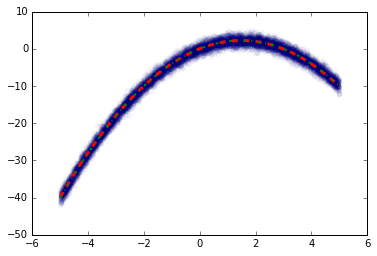

In [16]:
xplot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
Xplot = np.column_stack((xplot, xplot**2))
Yplot = model.predict(Xplot)

plt.scatter(x, y, alpha=0.03)
plt.plot(xplot, Yplot[:, 0], 'r--', lw=3)
plt.plot(xplot, 3*xplot - xplot**2, 'g-.', lw=2)

24.989957385161691